In [16]:
import hvsrpy
import numpy as np


from obspy.clients.fdsn import Client
from obspy.core import read
from obspy import UTCDateTime

import time
from scipy import stats
from matplotlib import pyplot as plt

import sys

In [2]:
import sigpropy

In [6]:
# Provide channel in a list for E, N, and Z components

def get_waveforms(client, t, starttime, endtime, net, sta, loc, channel):
    net, sta, loc = str(net), str(sta), str(loc)
    
    client = Client(client)
    
    if isinstance(channel, list):
        pass
    else:
        print('channel has to be a list for E, N, and Z components')
        
        
    for component in channel:
        
        
        st_e = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[0], starttime=starttime,
                               endtime=endtime, attach_response=True)
        
        st_n = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[1], starttime=starttime,
                               endtime=endtime, attach_response=True)
        
        st_z = client.get_waveforms(network = net, station = sta, location = loc, channel = channel[2], starttime=starttime,
                               endtime=endtime, attach_response=True)
        
        st_e.merge()
        st_n.merge()
        st_z.merge()
        
        
        ew = sigpropy.TimeSeries(st_e[0].traces.data, dt = st_e[0].stats.delta)
        ns = sigpropy.TimeSeries(st_n[0].traces.data, dt = st_n[0].stats.delta)
        vt = sigpropy.TimeSeries(st_z[0].traces.data, dt = st_z[0].stats.delta)
        
        
    return ew, ns, vt
        
        
    

In [9]:
t = UTCDateTime('2019-07-06T03:16:00.000')
client = 'IRIS'
starttime = t + 5*60
endtime = t - 5*60
net = 'CJ'
sta = 'T0133'
loc = '*'
channel = ['HNE', 'HNN', 'HNZ']

t0133 = get_waveforms(client = client, t = t, starttime = starttime, endtime = endtime, net = net, sta = sta, loc=loc, channel = channel)


FDSNBadRequestException: Bad request. If you think your request was valid please contact the developers.
HTTP Status code: 400
Detailed response of server:



In [38]:
from obspy.clients.fdsn import Client
client = Client('IRIS')
client2 = Client('SCEDC')
t = UTCDateTime('2019-07-06T03:19:53.040')
starttime = t + (15*60)
endtime = t - (15*60)
net = 'CI'
sta = 'Q0002'
loc = '*'
channel = 'HNE'


st = client2.get_waveforms(net, sta, loc, channel, starttime, endtime)
st_e.plot()



FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



In [22]:
del loc, channel, net, sta, client, t, starttime, endtime

In [256]:
t = UTCDateTime('2019-07-06T03:16:00.000')
starttime = t - 3600*3
endtime = t + 3600*3
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)

st_e.merge()


st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()
st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)

st_z.merge()


# Each stream has multple traces component so we need to add all the component to its according stream
# st = []
# for i in range(len(st1)):
#     s[i] = st1[i] + st2[i] + st3[i]
#     st.append(st)

1 Trace(s) in Stream:
CI.Q0002.01.HNZ | 2019-07-06T00:16:00.000000Z - 2019-07-06T06:16:00.000000Z | 200.0 Hz, 4320001 samples (masked)

In [20]:
st_e.traces[0].stats

               network: CI
               station: Q0002
              location: 01
               channel: HNE
             starttime: 2019-07-06T00:16:00.000000Z
               endtime: 2019-07-06T06:16:00.000000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 4320001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 26, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 1540608})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 7, 6, 6, 16)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 7, 6, 0, 16))']
              response: Channel Response
	From M/S**2 (Acceleration in meters per second squared) to COUNTS (Digital Count in Digital counts)
	Overall Sensitivity: 256354 defined at 1.000 Hz
	4 stages:
		Stage 1: Poles

In [34]:
np.set_printoptions(threshold = 2000)

In [257]:

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(st_z.traces[0].data, dt = st_z[0].stats.delta)

Elapsed Time: 1.53 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.32,1.37
"Fundamental Site Period, T0",3.09,1.37



Analysis summary:


,
Window length,60.0s
No. of windows,360
Number of iterations to convergence,8 of 50 allowed
No. of rejected windows,308



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.17,0.29
"Fundamental Site Period, T0",6.00,0.29


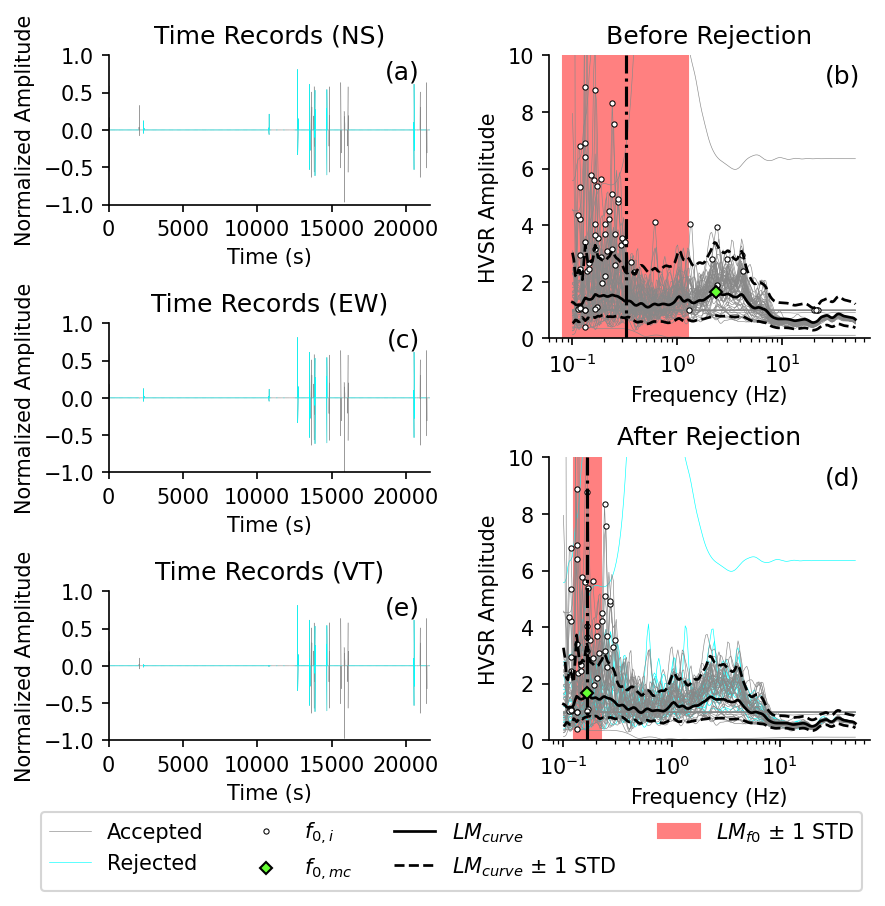

In [258]:
x_1 = get_hvsr(ew = ew, ns = ns, vt = vt, windowlength = 60)

In [42]:
type(st_e[0])

obspy.core.trace.Trace

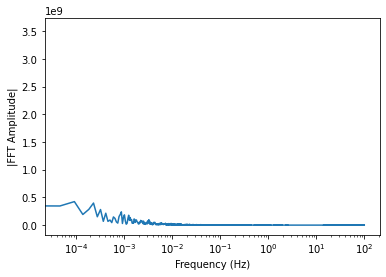

In [45]:
fseries = sigpropy.FourierTransform.from_timeseries(ew)

plt.plot(fseries.frequency, fseries.mag)
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|FFT Amplitude|")
plt.show()


In [46]:
ns = sigpropy.TimeSeries(st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(st_z.traces[0].data, dt = st_z[0].stats.delta)

In [212]:
def get_hvsr(ns, ew, vt, windowlength): 
    
    
    """TIME DOMAIN SETTING"""

    # Input file name (may be a relative or full path).

    # Window length in seconds. In general low frequency peaks require longer window lengths.
    # See the SESAME guidelines for specific window length recommendations.
    '''windowlength default is 60'''
    
    windowlength = float(windowlength)

    # Boolean to control whether Butterworth filter is applied. 
    # Geopsy does not apply a bandpass filter.
    filter_bool = False        
    # Low-cut frequency for bandpass filter.
    filter_flow = 0.1                   
    # High-cut frequency for bandpass filter.
    filter_fhigh = 30                   
    # Filter order.
    filter_order = 5

    # Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
    width = 0.1


    """FREQUENCY DOMAIN SETTING"""

    # Konno and Ohmachi smoothing constant. 40 is recommended.
    bandwidth = 40

    # Minimum frequency after resampling
    resample_fmin = 0.1  
    # Maximum frequency after resampling
    resample_fmax = 50
    # Number of frequencies after resampling
    resample_fnum = 200
    # Type of resampling {'log', 'linear'}
    resample_type = 'log'

    # Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
    peak_f_lower = None
    peak_f_upper = None

    """HVSR Settings"""

    # Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
    # Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
    method = "geometric-mean"
    # If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
    azimuth = 0

    # Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
    # Geopsy does not offer this functionality.
    rejection_bool = True
    # Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
    n = 2
    # Maximum number of iterations to perform for rejection -> 50 is recommended.
    max_iterations = 50

    # Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
    distribution_f0 = "lognormal"
    # Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
    distribution_mc = "lognormal"



    ymin, ymax = 0, 10
    fig = plt.figure(figsize=(6,6), dpi=150)
    gs = fig.add_gridspec(nrows=6,ncols=6)

    ax0 = fig.add_subplot(gs[0:2, 0:3])
    ax1 = fig.add_subplot(gs[2:4, 0:3])
    ax2 = fig.add_subplot(gs[4:6, 0:3])

    if rejection_bool:
        ax3 = fig.add_subplot(gs[0:3, 3:6])
        ax4 = fig.add_subplot(gs[3:6, 3:6])
    else:
        ax3 = fig.add_subplot(gs[0:3, 3:6])
        ax4 = False

    start = time.time()
    
    # Getting data from each stream components
    sensor = hvsrpy.Sensor3c(ns = ns, ew = ew, vt=vt, meta=None)
    bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
    resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}
    hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method, f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
    end = time.time()
    print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

    individual_width = 0.3
    median_width = 1.3
    for ax, title in zip([ax3, ax4], ["Before Rejection", "After Rejection"]):
        # Rejected Windows
        if title=="After Rejection":
            if len(hv.rejected_window_indices):
                label = "Rejected"
                for amp in hv.amp[hv.rejected_window_indices]:
                    ax.plot(hv.frq, amp, color='#00ffff', linewidth=individual_width, zorder=2, label=label)
                    label=None

        # Accepted Windows
        label="Accepted"
        for amp in hv.amp[hv.valid_window_indices]:
            ax.plot(hv.frq, amp, color='#888888', linewidth=individual_width,
                    label = label if title=="Before Rejection" else "")
            label=None

        # Window Peaks
        ax.plot(hv.peak_frq, hv.peak_amp, linestyle="", zorder=2,
                marker='o', markersize=2.5, markerfacecolor="#ffffff", markeredgewidth=0.5, markeredgecolor='k',
                label="" if title=="Before Rejection" and rejection_bool else r"$f_{0,i}$")

        # Peak Mean Curve
        ax.plot(hv.mc_peak_frq(distribution_mc), hv.mc_peak_amp(distribution_mc), linestyle="", zorder=4,
                marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', 
                label = "" if title=="Before Rejection" and rejection_bool else r"$f_{0,mc}$")

        # Mean Curve
        label = r"$LM_{curve}$" if distribution_mc=="lognormal" else "Mean"   
        ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width,
                label="" if title=="Before Rejection" and rejection_bool else label)

        # Mean +/- Curve
        label = r"$LM_{curve}$"+" ± 1 STD" if distribution_mc=="lognormal" else "Mean ± 1 STD"
        ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
                color='k', linestyle='--', linewidth=median_width, zorder=3,
                label = "" if title=="Before Rejection" and rejection_bool else label)
        ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
                color='k', linestyle='--', linewidth=median_width, zorder=3)

        # f0 +/- STD
        if ymin is not None and ymax is not None:
            ax.set_ylim((ymin, ymax))
        label = r"$LM_{f0}$"+" ± 1 STD" if distribution_f0=="lognormal" else "Mean f0 ± 1 STD"    
        _ymin, _ymax = ax.get_ylim()
        ax.plot([hv.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
        ax.fill([hv.nstd_f0_frq(-1, distribution_f0)]*2 + [hv.nstd_f0_frq(+1, distribution_f0)]*2, [_ymin, _ymax, _ymax, _ymin], 
                color = "#ff8080",
                label="" if title=="Before Rejection" and rejection_bool else label)
        ax.set_ylim((_ymin, _ymax))

        ax.set_xscale('log')
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("HVSR Amplitude")
        if rejection_bool:
            if title=="Before Rejection":
                print("\nStatistics before rejection:")
                hv.print_stats(distribution_f0)
                c_iter = hv.reject_windows(n, max_iterations=max_iterations, 
                                           distribution_f0=distribution_f0, distribution_mc=distribution_mc)
            elif title=="After Rejection":
                fig.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.51, 0), columnspacing=2)

                print("\nAnalysis summary:")  
                display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows", "Number of iterations to convergence", "No. of rejected windows"], 
                        data=[f"{windowlength}s", str(sensor.ns.nseries), f"{c_iter} of {max_iterations} allowed", str(sum(hv.rejected_window_indices))]))            
                print("\nStatistics after rejection:")
                hv.print_stats(distribution_f0)
        else:
            display(pd.DataFrame(columns=[""], index=["Window length", "No. of windows"], 
                             data=[f"{windowlength}s", str(sensor.ns.nseries)]))
            hv.print_stats(distribution_f0)
            fig.legend(loc="upper center", bbox_to_anchor=(0.77, 0.4))
            break
        ax.set_title(title)

    norm_factor = sensor.normalization_factor
    for ax, timerecord, name in zip([ax0,ax1,ax2], [sensor.ns, sensor.ew, sensor.vt], ["NS", "EW", "VT"]):
        ctime = timerecord.time
        amp = timerecord.amp/norm_factor
        ax.plot(ctime.T, amp.T, linewidth=0.2, color='#888888')
        ax.set_title(f"Time Records ({name})")
        ax.set_yticks([-1, -0.5, 0, 0.5, 1])
        ax.set_xlim(0, windowlength*timerecord.nseries)
        ax.set_ylim(-1, 1)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Normalized Amplitude')
        ax.plot(ctime[hv.rejected_window_indices].T, amp[hv.rejected_window_indices].T, linewidth=0.2, color="cyan")

    if rejection_bool:
        axs = [ax0, ax3, ax1, ax4, ax2]
    else:
        axs = [ax0, ax3, ax1, ax2]

    for ax, letter in zip(axs, list("abcde")):    
        ax.text(0.97, 0.97, f"({letter})", ha="right", va="top", transform=ax.transAxes, fontsize=12)
        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)


    fig.tight_layout(h_pad=1, w_pad=2, rect=(0,0.08,1,1))
    plt.show()
    
    
    return hv.mean_f0_frq(distribution_f0)

## DEFINING A GET_EVENT FUNCTION (t_bf, t_af, sta, net, loc, channel)

In [64]:


def get_event(t_bf, t_af, sta, net, loc, channel):
    st_e = 0
    try:
        for i in get_event(t_bf, t_af, sta, net, loc, channel):
            i += st_e
            
            break

    except:
        

        # Call client IRIS from obspy.Client(' string Client Code')
        client = Client('IRIS')
        # Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
        st_e = client.get_waveforms(station = str(sta), network = str(net), location = str(loc), channel = str(channel), starttime=tbf, endtime=taf,
                                    attach_response = True)

        st_e.merge()
        print(st_e.traces[0].data)
    
    return st_e

In [260]:
t = UTCDateTime('2019-07-06T03:16:00.000')
starttime = t - 5*60
endtime = t + 5*60
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)

st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()
st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)

st_z.merge()


1 Trace(s) in Stream:
CI.Q0002.01.HNZ | 2019-07-06T03:15:59.850000Z - 2019-07-06T03:21:00.000000Z | 200.0 Hz, 60031 samples

In [261]:
# Find maximum start time end minimum end time
max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()
   
# Trimming traces so they have equal length (equal number of samples)

In [262]:
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)

CI.Q0002.01.HNN | 2019-07-06T03:15:59.850000Z - 2019-07-06T03:21:00.000000Z | 200.0 Hz, 60031 samples

In [263]:
st_e[0].trim(starttime=max_start_time, endtime = min_end_time)

CI.Q0002.01.HNE | 2019-07-06T03:15:59.850000Z - 2019-07-06T03:21:00.000000Z | 200.0 Hz, 60031 samples

In [264]:
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

CI.Q0002.01.HNZ | 2019-07-06T03:15:59.850000Z - 2019-07-06T03:21:00.000000Z | 200.0 Hz, 60031 samples

In [265]:

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

In [137]:
st_e[0].stats

               network: CI
               station: Q0002
              location: 01
               channel: HNE
             starttime: 2019-07-06T03:15:59.365000Z
               endtime: 2019-07-06T03:21:00.000000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 60128
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 251, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 128512})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 7, 6, 3, 21)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 7, 6, 3, 11))']
              response: Channel Response
	From M/S**2 (Acceleration in meters per second squared) to COUNTS (Digital Count in Digital counts)
	Overall Sensitivity: 256354 defined at 1.000 Hz
	4 stages:
		Stage 1: PolesZe

In [140]:
type(st_n[0].stats.starttime)

obspy.core.utcdatetime.UTCDateTime

In [189]:
st_n[0].stats

               network: CI
               station: Q0002
              location: 01
               channel: HNN
             starttime: 2019-07-06T03:15:59.120000Z
               endtime: 2019-07-06T03:21:00.000000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 60177
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 176, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 90112})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 7, 6, 3, 21)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 7, 6, 3, 11))']
              response: Channel Response
	From M/S**2 (Acceleration in meters per second squared) to COUNTS (Digital Count in Digital counts)
	Overall Sensitivity: 256354 defined at 1.000 Hz
	4 stages:
		Stage 1: PolesZer

In [ ]:
# fseries1 = sigpropy.FourierTransform.from_timeseries(ns)


# fig = plt.fig()
# ax1, ax2 = fig.subplots(2, 1, sharey=True,sharex=True)

# '''PLOT FOURIER SPECTRA FOR NS COMPONENT'''
# ax1.plot(fseries1.frequency, fseries1.mag, color = 'gray', linewidth = 0.5)


# ax1.set_xscale('log')
# ax1.set_xlabel('Frequency in Hz')

# ax1.set_ylabel('Fourier Amplitude')

# ax1.set_title('NS component', fontstyle = 'italic')



# '''PLOT FOURIER SPECTRA FOR NS COMPONENT'''

# fseries2 = sigpropy.FourierTransform.from_timeseries(vt)

# ax2.plot(fseries2.frequency, fseries2.mag, color = 'gray', linewidth = 0.5)


# ax2.set_xscale('log')
# ax2.set_xlabel('Frequency in Hz')

# ax2.set_ylabel('Fourier Amplitude')

# ax2.set_title('Vertical component', fontstyle = 'italic')
# plt.show()

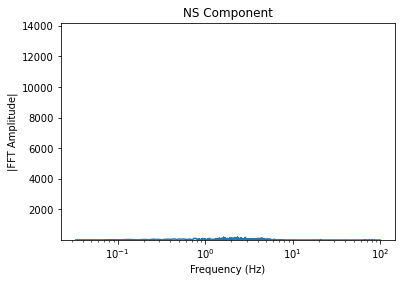

In [197]:
fseries = sigpropy.FourierTransform.from_timeseries(ns)

plt.plot(fseries.frequency[10:], fseries.mag[10:])
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|FFT Amplitude|")
plt.ylim(np.min(fseries.mag), np.max(fseries.mag))

plt.title('NS Component')
plt.show()

In [104]:
np.min(fseries.mag)

0.0009666635291590423

In [90]:
fseries.mag[-1]

0.13635489307861245

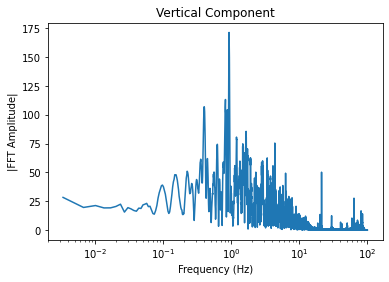

In [94]:
fseries = sigpropy.FourierTransform.from_timeseries(vt)

plt.plot(fseries.frequency[1:], fseries.mag[1:])
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|FFT Amplitude|")
plt.title('Vertical Component')
plt.show()

Elapsed Time: 0.05 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.30,1.48
"Fundamental Site Period, T0",3.29,1.48



Analysis summary:


,
Window length,60.0s
No. of windows,5
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,0



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.30,1.48
"Fundamental Site Period, T0",3.29,1.48


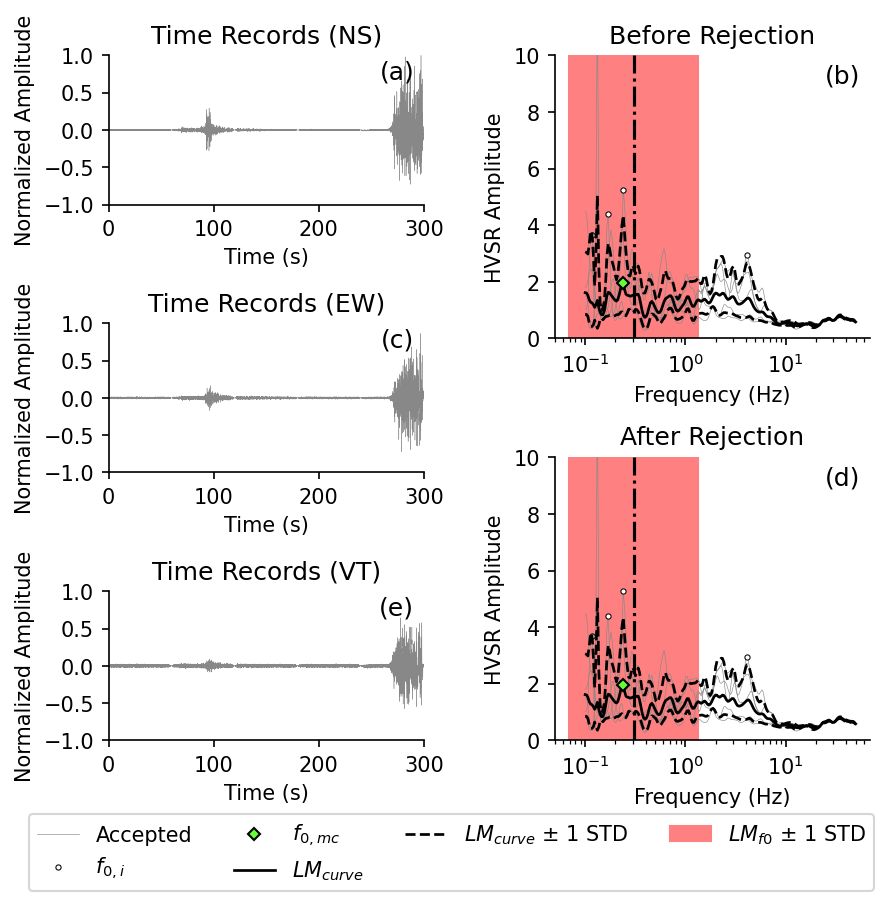

In [266]:
x_2 = get_hvsr(ns= ns, ew = ew, vt = vt, windowlength = 60)

In [225]:
t = UTCDateTime('2020-09-19T06:38:46.930000Z')
starttime = t - 3*3600
endtime = t + 3*3600
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()
   

In [226]:
st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

CI.Q0002.01.HNZ | 2020-09-19T06:37:48.965000Z - 2020-09-19T06:42:00.255000Z | 200.0 Hz, 50259 samples

In [205]:
# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

## x_3 is Earthquake in 2020 for 6-hr window

Elapsed Time: 0.05 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.52,1.41
"Fundamental Site Period, T0",1.91,1.41



Analysis summary:


,
Window length,60.0s
No. of windows,4
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,0



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.52,1.41
"Fundamental Site Period, T0",1.91,1.41


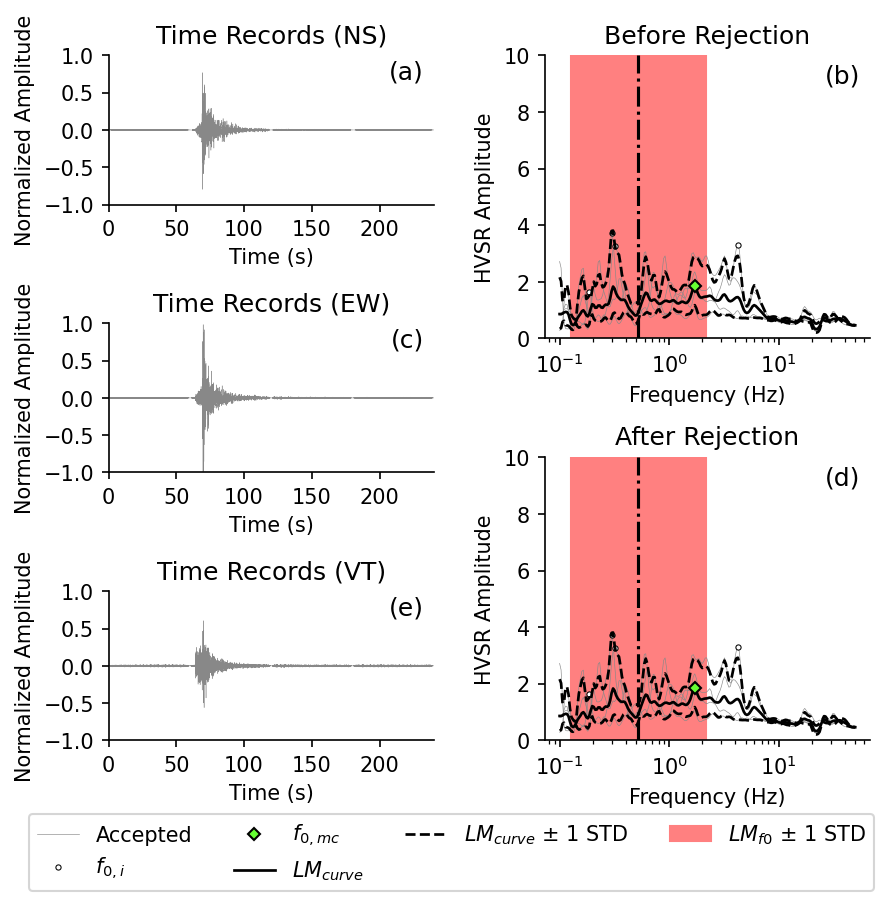

In [213]:
x_3 = get_hvsr(ew = ew, ns = ns, vt = vt, windowlength = 60)

In [215]:
x_3

0.5233848615943105

## x_4 2020 earthquake in 2 minutes window

In [227]:
t = UTCDateTime('2020-09-19T06:38:46.930000Z')
starttime = t - 1*60
endtime = t + 1*60
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()


In [228]:
st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

In [229]:
st_e[0].stats

               network: CI
               station: Q0002
              location: 01
               channel: HNE
             starttime: 2020-09-19T06:37:48.965000Z
               endtime: 2020-09-19T06:39:46.930000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 23594
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 103, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 52736})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2020, 9, 19, 6, 39, 46, 930000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 9, 19, 6, 37, 46, 930000))', 'ObsPy 1.3.0: trim(endtime=UTCDateTime(2020, 9, 19, 6, 39, 46, 930000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 9, 19, 6, 37, 48, 965000))']
              res

Elapsed Time: 0.03 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.17,0.51
"Fundamental Site Period, T0",5.79,0.51



Analysis summary:


,
Window length,40.0s
No. of windows,2
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,0



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.17,0.51
"Fundamental Site Period, T0",5.79,0.51


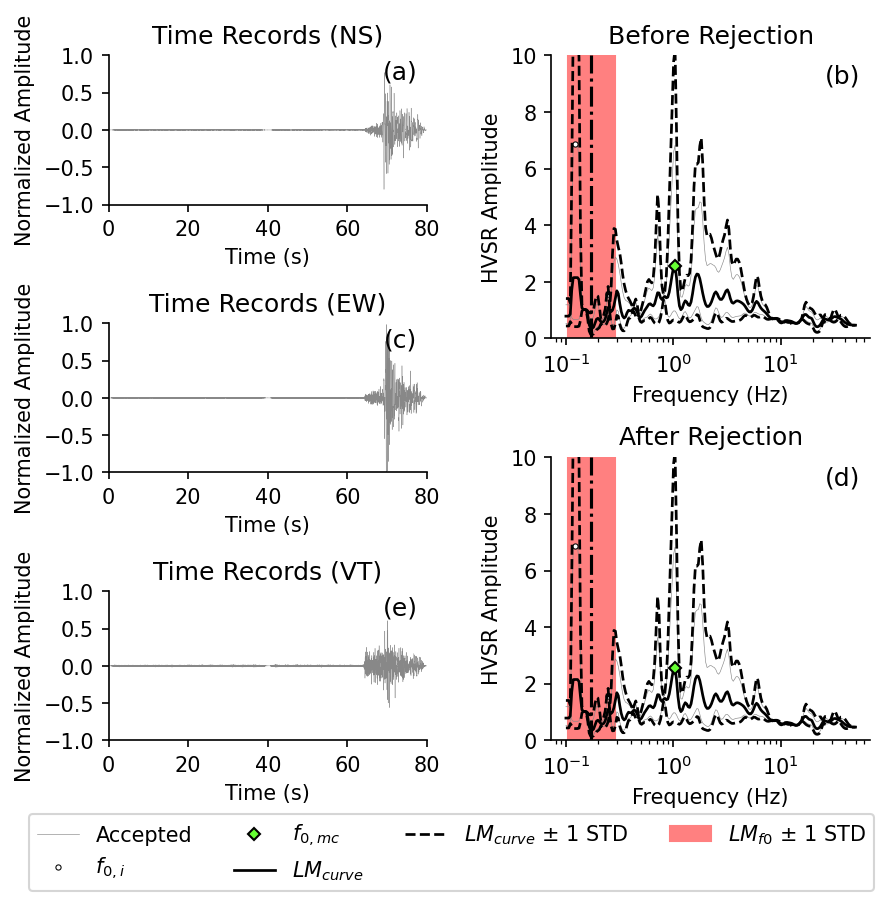

In [230]:
x_4 = get_hvsr(ew = ew, ns = ns, vt = vt, windowlength = 40)

## 6 hr window

(https://earthquake.usgs.gov/earthquakes/eventpage/ci15507801/executive)

In [247]:
t = UTCDateTime('2014-06-02T02:36:43.930000Z')
starttime = t - 3*3600
endtime = t + 3*3600
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()


In [248]:
st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

Elapsed Time: 0.09 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.28,0.58
"Fundamental Site Period, T0",3.59,0.58



Analysis summary:


,
Window length,60.0s
No. of windows,12
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,3



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.28,0.58
"Fundamental Site Period, T0",3.59,0.58


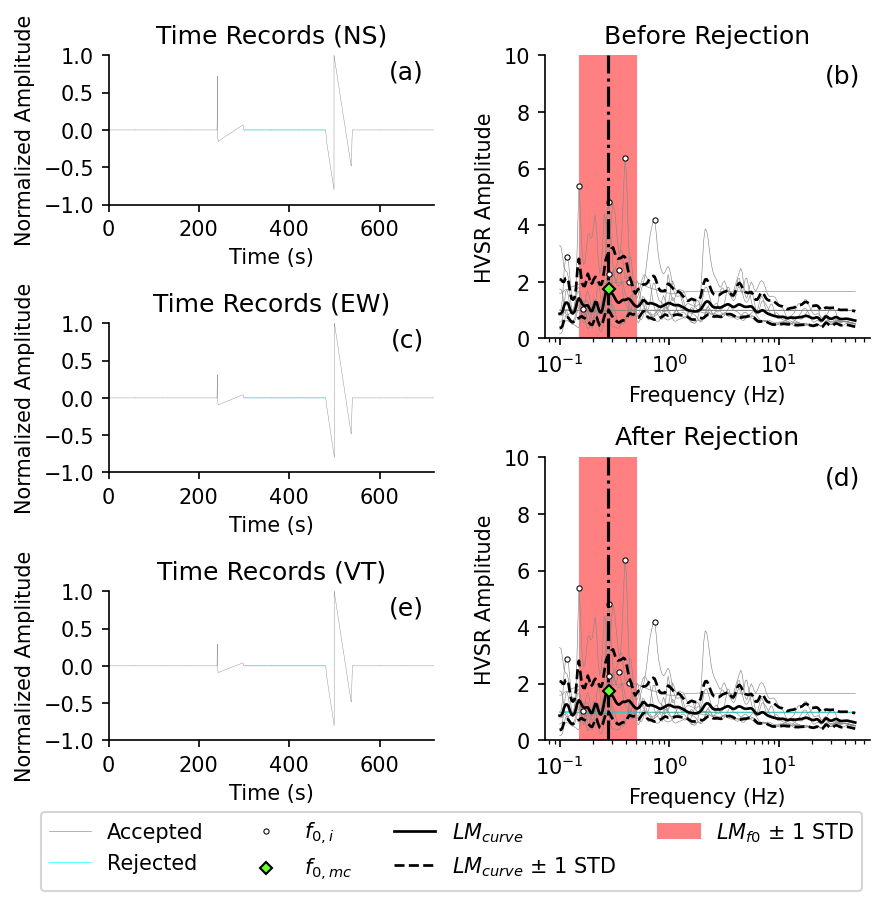

In [249]:
x_5 = get_hvsr(ew = ew, ns = ns, vt = vt, windowlength = 60)

## 10 minutes window

In [250]:
t = UTCDateTime('2014-06-02T02:36:43.930000Z')
starttime = t - 5*60
endtime = t + 5*60
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()

In [251]:
st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

In [253]:
st_e[0].stats

               network: CI
               station: Q0002
              location: 01
               channel: HNE
             starttime: 2014-06-02T02:35:49.745000Z
               endtime: 2014-06-02T02:39:50.560000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 48164
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 223, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 114176})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2014, 6, 2, 2, 41, 43, 930000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2014, 6, 2, 2, 31, 43, 930000))', 'ObsPy 1.3.0: trim(endtime=UTCDateTime(2014, 6, 2, 2, 39, 50, 560000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2014, 6, 2, 2, 35, 49, 745000))']
              respon

Elapsed Time: 0.07 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.29,0.03
"Fundamental Site Period, T0",3.46,0.03



Analysis summary:


,
Window length,80.0s
No. of windows,3
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,0



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.29,0.03
"Fundamental Site Period, T0",3.46,0.03


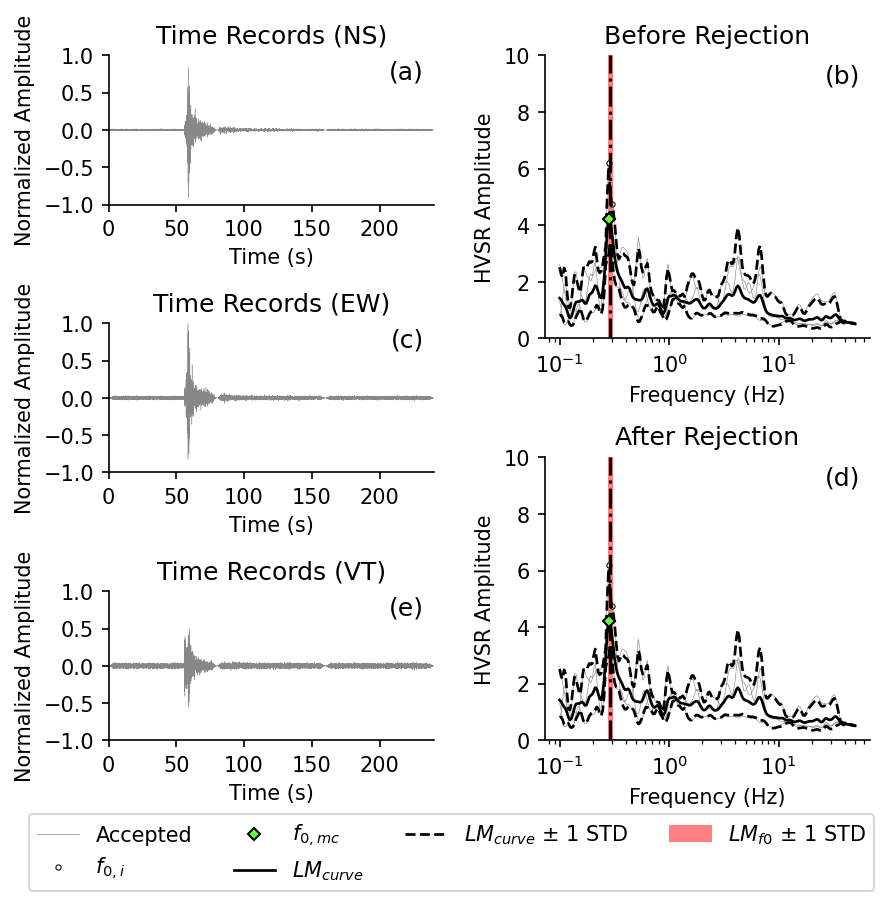

In [252]:
x_6 = get_hvsr(ew = ew, ns = ns, vt = vt, windowlength = 80)

(https://earthquake.usgs.gov/earthquakes/eventpage/ci15476961/executive)

## 6-hr window and 10-minutes window

In [254]:
t = UTCDateTime('2014-03-17T13:25:36.870000Z')
starttime = t - 3*3600
endtime = t + 3*3600
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()

st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

Elapsed Time: 0.30 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.59,1.3
"Fundamental Site Period, T0",1.70,1.3



Analysis summary:


,
Window length,60.0s
No. of windows,62
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,53



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.59,1.3
"Fundamental Site Period, T0",1.70,1.3


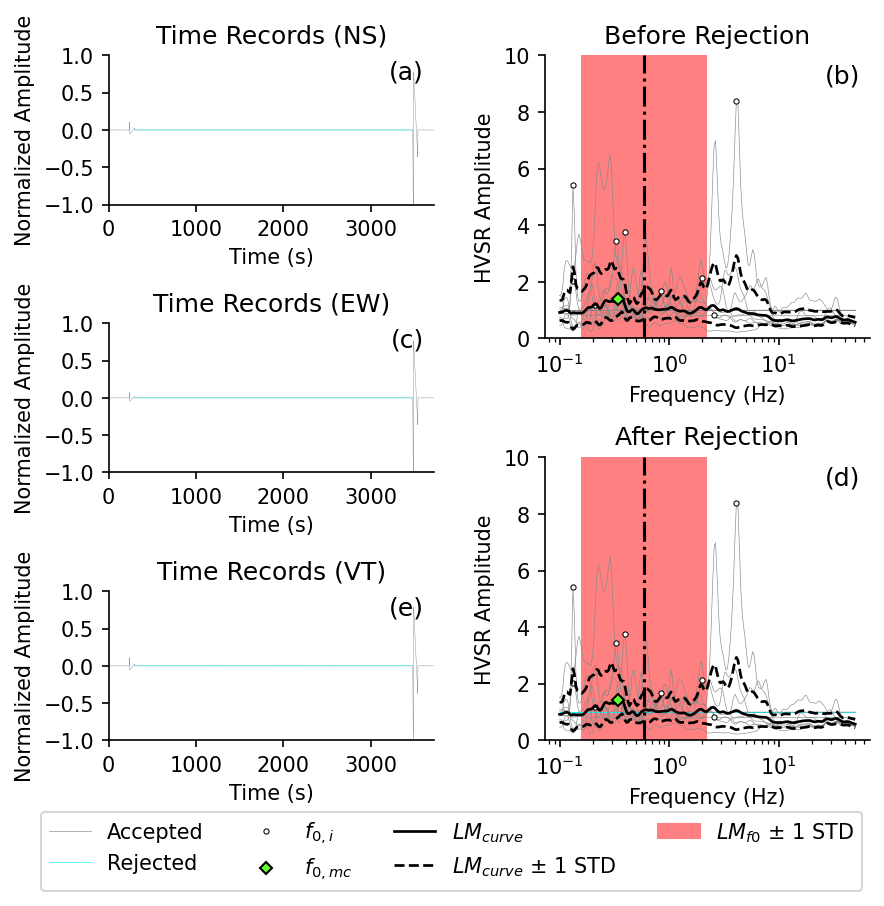

In [255]:
x_7 = get_hvsr(ew = ew, ns=ns, vt=vt, windowlength = 60)

In [267]:
t = UTCDateTime('2014-03-17T13:25:36.870000Z')
starttime = t - 5*60
endtime = t + 5*60
# Call client IRIS from obspy.Client(' string Client Code')
client = Client('IRIS')    
# Get_waveform from obspy (sta, net, loc, instruments, starttime = starttime, endtime = None)
st_e = client.get_waveforms("CI", "Q0002", "*", "HNE", starttime, endtime, attach_response = True)
st_e.merge()

st_n = client.get_waveforms("CI", "Q0002", "*", "HNN", starttime, endtime, attach_response = True)
st_n.merge()

st_z = client.get_waveforms("CI", "Q0002", "*", "HNZ", starttime, endtime, attach_response = True)
st_z.merge()

max_start_time = np.array([st_e[0].stats.starttime, st_n[0].stats.starttime, st_z[0].stats.starttime]).max()
min_end_time = np.array([st_e[0].stats.endtime, st_n[0].stats.endtime, st_z[0].stats.endtime]).min()

st_e[0].trim(starttime=max_start_time, endtime = min_end_time)
st_n[0].trim(starttime=max_start_time, endtime = min_end_time)
st_z[0].trim(starttime=max_start_time, endtime = min_end_time)

# Call sigpropy to convert to time series with amplitudes ndarrays, 
# and time steps. TimeSeries method() take 2 parameters (self, amplitude, dt)
# which amplitude is amplitude of the time series at each time step;
# dt = time step between samples in seconds
ew = sigpropy.TimeSeries(amplitude = st_e.traces[0].data, dt = st_e[0].stats.delta)
ns = sigpropy.TimeSeries(amplitude = st_n.traces[0].data, dt = st_n[0].stats.delta)
vt = sigpropy.TimeSeries(amplitude = st_z.traces[0].data, dt = st_z[0].stats.delta)

Elapsed Time: 0.05 seconds

Statistics before rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.52,1.46
"Fundamental Site Period, T0",1.94,1.46



Analysis summary:


,
Window length,60.0s
No. of windows,4
Number of iterations to convergence,1 of 50 allowed
No. of rejected windows,0



Statistics after rejection:


,Lognormal Median,Lognormal Standard Deviation
"Fundamental Site Frequency, f0",0.52,1.46
"Fundamental Site Period, T0",1.94,1.46


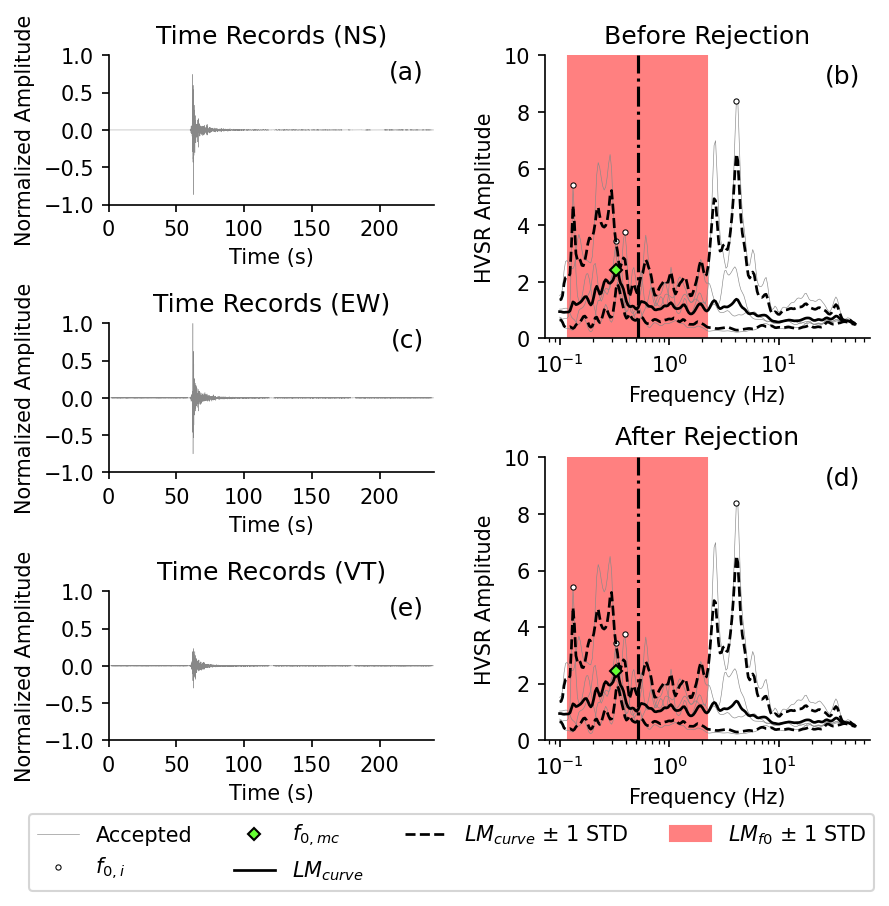

In [268]:
x_8 = get_hvsr(ew = ew, ns=ns, vt=vt, windowlength = 60)

In [273]:
i = np.arange(0,9,1)
print(f'x_{i}')

x_[0 1 2 3 4 5 6 7 8]


In [270]:
mean_frq

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8']